# 06. Model Selection

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts
from sklearn.preprocessing import (RobustScaler)
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline # Usando o pipeline do imblearn pois esse é um dataset desbalanceado
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN) # Armazenando o dataset tratado em uma variável

In [3]:
df # Exbindo uma visão geral do dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [6]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Definindo os valores de x e y para o modelo de classificação

In [7]:
x = df.drop('Class', axis=1) # Definindo os valores de x para o modelo, separando a variável target do dataset
y = df['Class'] # Definindo os valores de y para o modelo, deixando o dataset somente com a variável target

In [8]:
x.head(3) # Visualizando os dados de x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [9]:
y.head(3) # Visualizando os dados de y

0    0
1    0
2    0
Name: Class, dtype: int64

In [10]:
display(df['Class'].value_counts(normalize=True).map('{:.2%}'.format).sort_index()) # Verificando o percentual de fraudes

Class
0    99.83%
1     0.17%
Name: proportion, dtype: object

### Listando as variáveis numéricas e categóricas de x

In [11]:
numerical_features = x.select_dtypes(include='number').columns # Armazenando as features numéricas em uma variável
categorical_features = x.select_dtypes(exclude='number').columns # Armazenando as features categóricas em uma variável

print('- Numerical Features:') # Printando as variávei numéricas
for feature in numerical_features:
    print(feature)

print('\n- Categorical Features:') # Printando as variávei categóricas
for feature in categorical_features:
    print(feature)

- Numerical Features:
Time
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount

- Categorical Features:


### Visualizando a distribuição das features de x em histogramas

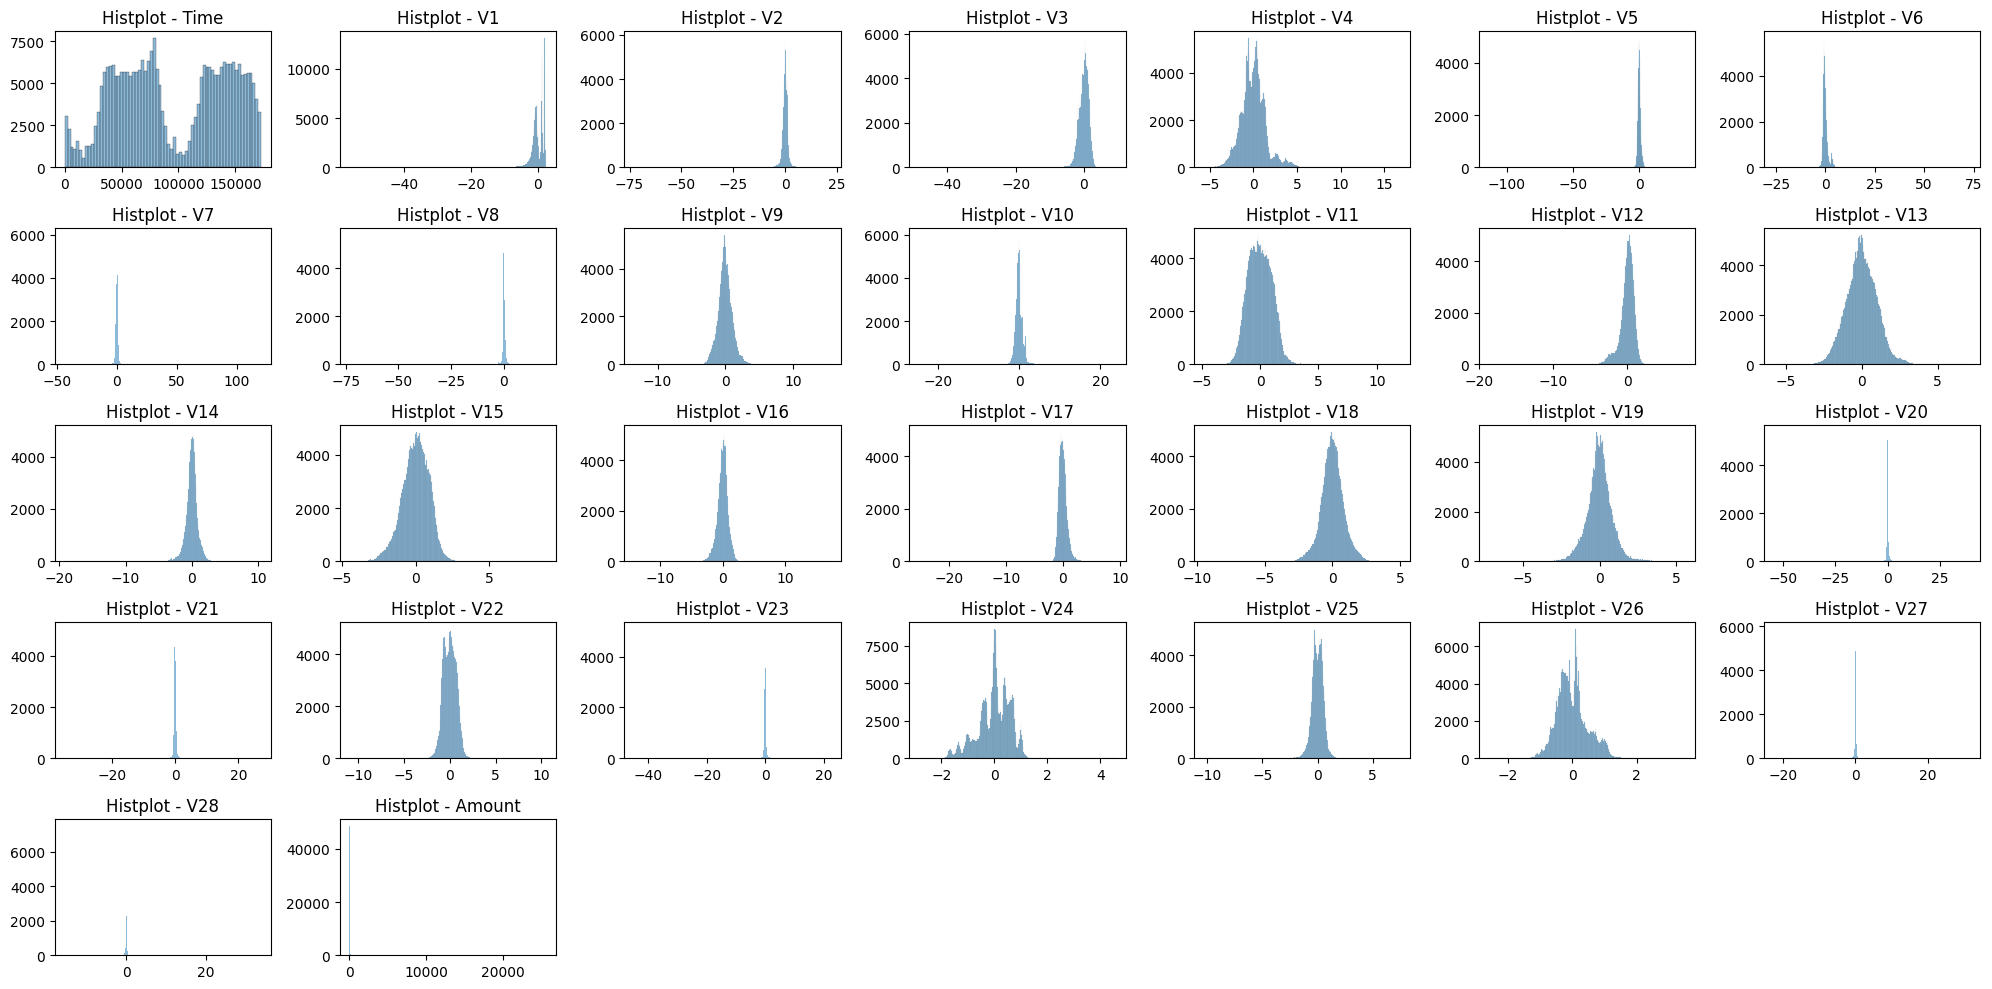

In [12]:
fn_charts.histplots(x, numerical_features, num_cols=7, height_figsize=2) # Criando os histplots para ver sua distribuição

### Definindo por qual procedimento cada feature de x vai passar

In [13]:
na_cols = df.columns[df.columns.str.startswith('V')] # Definindo as colunas que não precisam passar por pré processamentos

robust_cols = [ # Definindo as colunas que vão passar por Robust Scaler
    'Time', # Coluna com muitos outliers
    'Amount', # Coluna com muitos outliers
]

### Definindo os modelos de classificação que serão usados

In [14]:
models = { # Definindo os modelos de classificação que serão usados
    'DummyClassifier': DummyClassifier(strategy='stratified', random_state=consts.RANDOM_STATE), # Modelo base para referência
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=consts.RANDOM_STATE),
    'LogisticRegression': LogisticRegression(random_state=consts.RANDOM_STATE),
    'KNNClassifier': KNeighborsClassifier(n_neighbors=5),
}

### Criando a função com o pipeline

In [15]:
def pipeline( # Função para fazer todo o procedimento de pipeline e validação cruzada, e retornar os scores
    x, # Passando o x como parâmetro da função
    y, # Passando o y como parâmetro da função
    model, # Passando o modelo como parâmetro da função
): 

    preprocessing = ColumnTransformer( # Estabelecendo os pré processamentos que serão aplicados nas features
        [ # Passando a inicial do novo nome da coluna, o pré processamento que será aplicado e a lista de colunas para pré processamento
            ('robust_scaler', RobustScaler(), robust_cols),
        ], remainder='passthrough', # Definindo o que acontece com as demais colunas, no caso não acontece nada ao invés de excluí-las
    )

    pipeline = Pipeline( # Criando o pipeline para o modelo de classificação (Pipeline do Imblearn para tratar o desbalanceamento do dataset)
        [ # Passando as etapas do pipeline
            ('pre_processing', preprocessing), # Fazendo o pré processamento conforme as definições anteriores
            ('resampling', RandomUnderSampler(random_state=consts.RANDOM_STATE)), # Tratando o dataset desbalanceado com Random Under Sampler (RUS)
            ('models', model), # Aplicando o modelo passado para a função
        ]
    )

    scores = cross_validate( # Fazendo a validação cruzada para testar diversas combinações de separação entre dados de treino e teste
            # visando ter diversos valores para as métricas, e assim trabalhar com os valores médios ou mais frequentes
        pipeline, # Passando o pipeline definido acima
        x, # Passando o dataset x
        y, # Passando o dataset y
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=consts.RANDOM_STATE), # Aplicando o StratifiedKFold por ser um dataset 
            # desbalanceado, com um número inicial de 5 folds e aplicando o shuffle pois não se trata de um caso de séries temporais
        scoring=['accuracy', 'precision', 'recall', 'roc_auc', 'average_precision'], # Definindo as métricas de avaliação dos modelos
        n_jobs=-2, # Definindo para usar toda a capacidade de processamento do computador e deixar um processador livre para não travar
    )

    return scores # Retornando os scores

### Aplicando a função com o pipeline e armazenando os resultados de cada modelo

In [16]:
results = { # Aplicando a função com o Pipeline, passando os datasets x, y e os modelos, e armazenando os resultados em uma variável
    'DummyClassifier': pipeline(x, y, models['DummyClassifier']),
    'DecisionTreeClassifier': pipeline(x, y, models['DecisionTreeClassifier']),
    'LogisticRegression': pipeline(x, y, models['LogisticRegression']),
    'KNNClassifier': pipeline(x, y, models['KNNClassifier']),
}

### Criando um dataset com os resultados dos modelos

In [17]:
for key, value in results.items(): # Criando uma estrutura de repetição para percorrer os resultados dos modelos
    results[key]['time'] = results[key]['fit_time'] + results[key]['score_time'] # Criando a coluna de tempo somando fit_time e score_time

df_results = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'model'}) # Criando um df transposto com os resultados dos modelos

df_results_explode = df_results.explode(df_results.columns[1:].to_list()).reset_index(drop=True) # Criando um df separando os maps por linhas

df_results_explode # Exibindo o dataset com os resultados dos modelos

,model,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,DummyClassifier,0.357579,0.191613,0.500369,0.001757,0.505051,0.502706,0.001747,0.549192
1,DummyClassifier,0.36148,0.186194,0.500404,0.001792,0.515152,0.507765,0.001766,0.547674
2,DummyClassifier,0.341162,0.195369,0.500377,0.001757,0.510204,0.505282,0.001739,0.536532
3,DummyClassifier,0.325611,0.179729,0.500342,0.001722,0.5,0.500171,0.001721,0.505341
4,DummyClassifier,0.374916,0.191536,0.500132,0.001511,0.438776,0.469506,0.001628,0.566452
5,DecisionTreeClassifier,0.696348,0.211963,0.913802,0.017839,0.89899,0.906409,0.016213,0.908311
6,DecisionTreeClassifier,0.699171,0.200256,0.89658,0.015557,0.939394,0.91795,0.01472,0.899427
7,DecisionTreeClassifier,0.698173,0.203251,0.90806,0.016557,0.897959,0.903018,0.015043,0.901424
8,DecisionTreeClassifier,0.707211,0.204553,0.906515,0.016287,0.897959,0.902244,0.014801,0.911764
9,DecisionTreeClassifier,0.728269,0.201356,0.889661,0.01383,0.897959,0.893803,0.012594,0.929624


### Comparando os resultados dos modelos através de boxplots

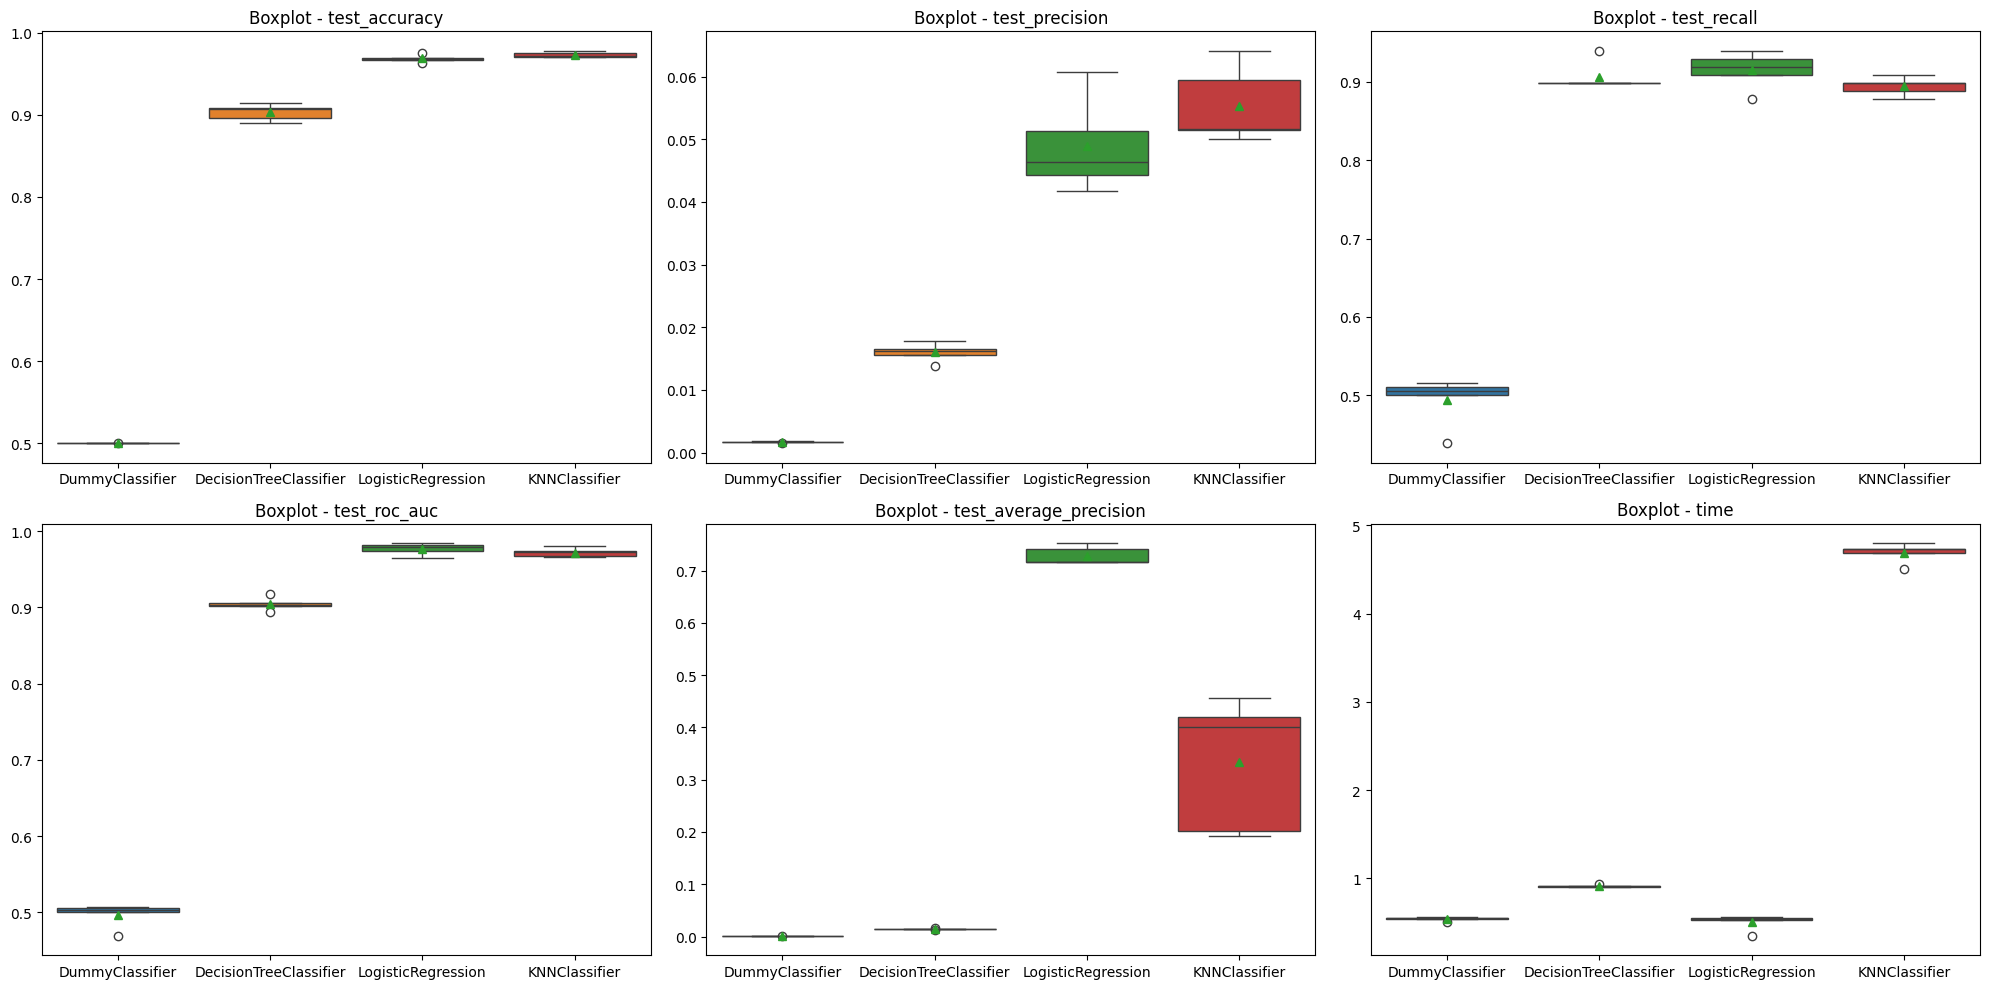

In [18]:
fn_charts.boxplots(df_results_explode, df_results.columns[3:].to_list(), 'model') # Criando os boxplots para avaliação dos modelos

### Avaliando os resultados de cada modelo

| Posição  | Accuracy               | Precision              | Recall                 | ROC-AUC                | Average Precision      | Time                 |
|----------|------------------------|------------------------|------------------------|------------------------|------------------------|----------------------|
| Referência | Quanto maior melhor    | Quanto maior melhor    | Quanto maior melhor    | Quanto maior melhor    | Quanto maior melhor    | Quanto menor melhor  |
| 1        | KNNClassifier           | KNNClassifier          | **LogisticRegression**     | **LogisticRegression**      | **LogisticRegression**      | DummyClassifier      |
| 2        | **LogisticRegression**      | **LogisticRegression**     | DecisionTreeClassifier | KNNClassifier           | KNNClassifier           | **LogisticRegression**   |
| 3        | DecisionTreeClassifier  | DecisionTreeClassifier | KNNClassifier          | DecisionTreeClassifier  | DecisionTreeClassifier  | DecisionTreeClassifier |
| 4        | DummyClassifier         | DummyClassifier        | DummyClassifier        | DummyClassifier         | DummyClassifier         | KNNClassifier        |

### Definindo o modelo que será utilizado no projeto de classificação

Após análise dos resultados de cada um dos modelos, é possível concluir que o modelo com os melhores resultados foi o de Logistic Regression, pois liderou os resultados nas métricas de Recall, ROC_AUC e Average Precision, e ficou na segunda posição nas métricas de Accuracy, Precision e Time. Além disso, no caso de datasets desbalanceados como é o caso desse estudo, as principais métricas avaliadas são o ROC_AUC e o Average Precision, onde o modelo de Logistic Regression também obteve as melhores performances. E em relação ao processamento, esse modelo também teve uma das melhores performances com o tempo de processamento. 

Portando, diante de todo esse contexto, **o melhor modelo para ser usado no projeto é o Logistic Regression**.